# Business Problem

Many subscription- or contract-based businesses, like telecom, depend on recurring revenues from existing customers. When customers stop using the service or cancel subscriptions (“churn”), the business not only loses immediate revenue but also sacrifices future revenues and lifetime value from those customers. A high churn rate therefore, undermines revenue predictability and forces the company to spend more on acquiring new customers — often much more than retaining existing ones, which erodes profit margins and slows growth.

By identifying which customers are likely to churn, and understanding the factors driving churn, a business can proactively intervene (e.g., with retention campaigns, improved offerings, or personalized incentives) to reduce churn, increase customer lifetime value, and secure long-term profitability.


**Data Overview**

**Customer Information**

- customerID – Unique customer identifier

- gender – Male/Female

- SeniorCitizen – 0 = Not senior, 1 = Senior citizen

- Partner – Whether the customer has a partner (Yes/No)

- Dependents – Whether the customer has dependents (Yes/No)

**Account Tenure**

- tenure – Number of months the customer has stayed

**Phone & Internet Services**

- PhoneService – Whether the customer has a phone service (Yes/No)

- MultipleLines – Multiple phone lines status (Yes/No/No phone service)

- InternetService – DSL / Fiber optic / No internet

- OnlineSecurity – Online security add-on (Yes/No)

- OnlineBackup – Online backup add-on

- DeviceProtection – Device protection add-on

- TechSupport – Tech support add-on

- StreamingTV – Streaming TV add-on

- StreamingMovies – Streaming Movies add-on

**Contract & Billing**

- Contract – Type of contract (Month-to-month / One year / Two year)

- PaperlessBilling – Whether billing is paperless (Yes/No)

- PaymentMethod – e.g., Electronic check, Mailed check, Bank transfer, Credit card

**Charges**

- MonthlyCharges – Current monthly bill

- TotalCharges – Total amount paid till date

**Target Variable**

- Churn – Whether the customer left the company (Yes/No)

**Importing Necessary Libraries**

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# For visualization later (optional at this stage)
import matplotlib.pyplot as plt
import seaborn as sns


**Uploading and Understanding The Data**

In [2]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")


In [3]:
# Look at top rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Summary of columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [6]:
## Check for missing Value
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
## Dealing with Negative Values
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure']) 

In [8]:
## Understanding the final shape of Dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 7043
Columns: 21


In [9]:
## Strip Extra Spaces in Categorical Columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()


In [10]:
# Step 1: Clean text in binary columns
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

    # Step 2: Map safely
    df[col] = df[col].map({'yes': 1, 'no': 0})

    # Step 3: Replace NaN values (fallback)
    df[col] = df[col].fillna(0)

    # Step 4: Convert to integer
    df[col] = df[col].astype('int64')

# SeniorCitizen is numeric already
df['SeniorCitizen'] = df['SeniorCitizen'].fillna(0).astype('int64')


In [11]:
## Creating Tenure Groups
bins = [0, 12, 24, 48, 60, 72]
labels = ['0–1 yr', '1–2 yr', '2–4 yr', '4–5 yr', '5–6 yr']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)


# Exploratory Data Analysis

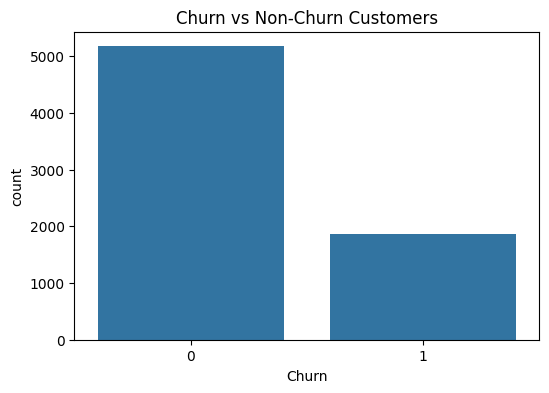

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [12]:
## Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn vs Non-Churn Customers")
plt.show()

df['Churn'].value_counts(normalize=True) * 100


In [13]:
churn_rate = df['Churn'].mean()
print("Overall Churn Rate: {:.2f}%".format(churn_rate*100))

Overall Churn Rate: 26.54%


**Monthly Charges Distribution**

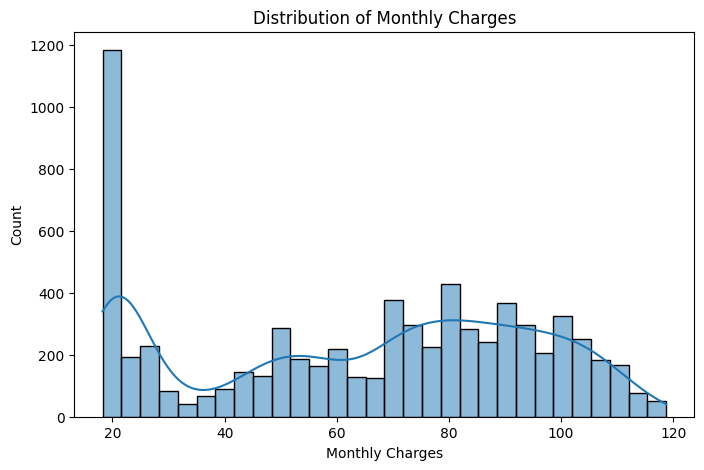

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

This means:

✔ Most customers are on cheaper or basic plans
✔ Only a smaller segment pays for premium services

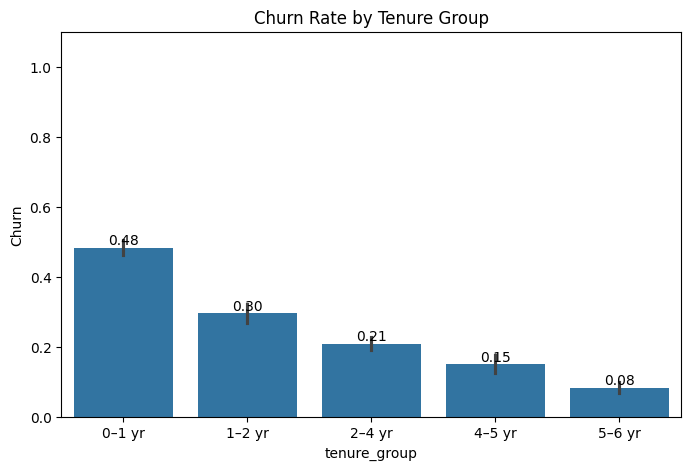

In [15]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='tenure_group', y='Churn')

# Add labels (short, simple)
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom'
    )

plt.title("Churn Rate by Tenure Group")
plt.ylim(0, df['Churn'].max() + 0.1)  # simplest scaling
plt.show()


- The short-tenure group (0–12 months) shows the highest churn rate.

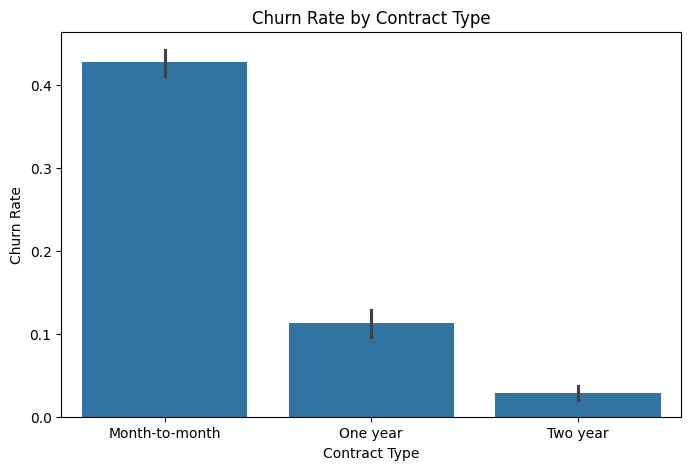

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Contract', y='Churn')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()


- The month-to-month contract type showed the most Churn

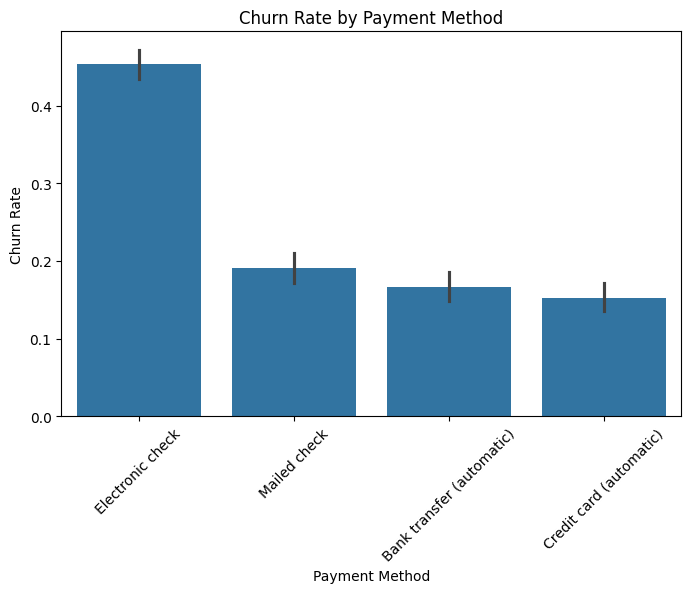

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='PaymentMethod', y='Churn')
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.show()


- The customers who used an Electronic check as a payment method are more likely to churn

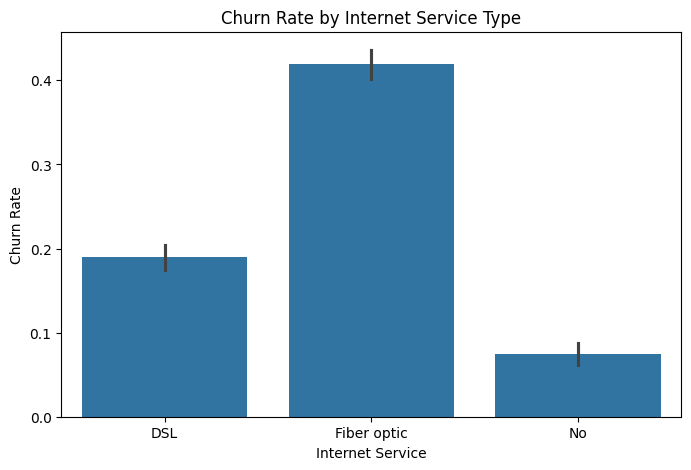

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='InternetService', y='Churn')
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Churn Rate")
plt.show()


- Customers with Fiber optic internet services showed higher churn rate than others

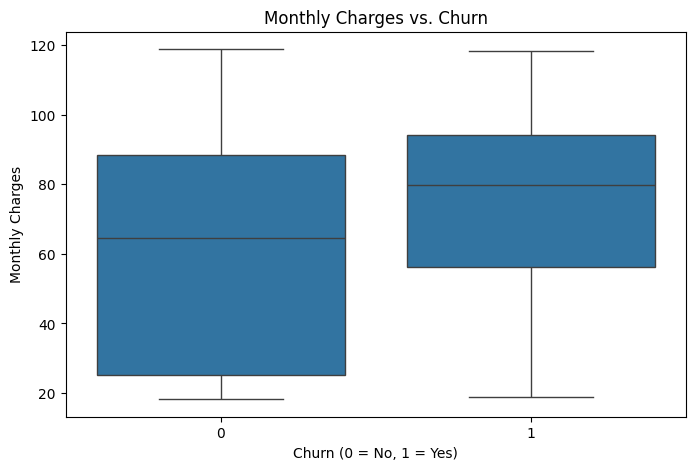

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()


This chart tells you:

- Billing amount is a strong churn predictor.

- Customers on mid-to-high price plans are most at risk.

- Pricing strategy or value communication needs improvement.

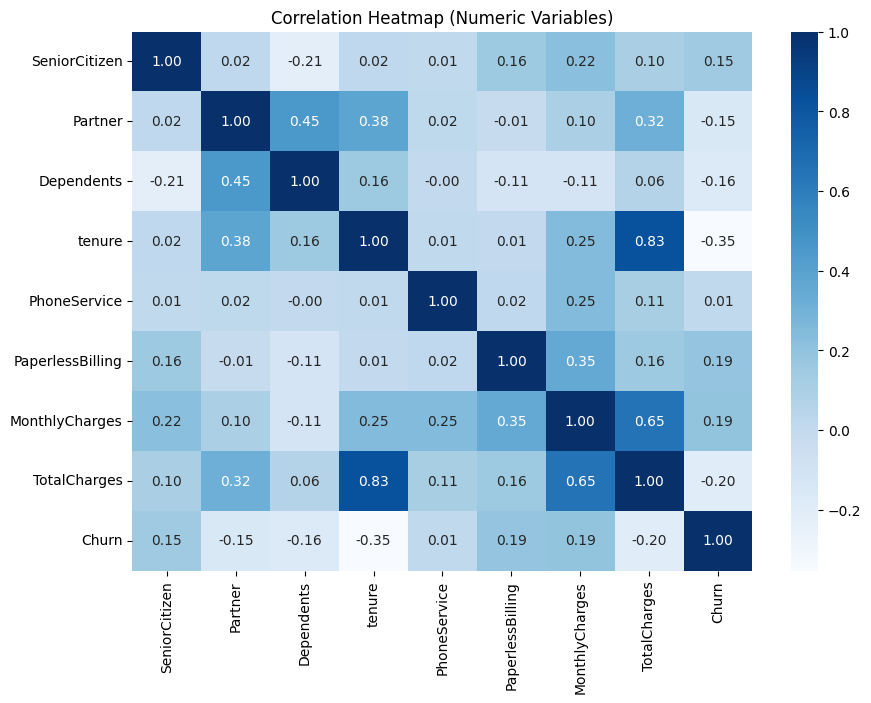

In [20]:
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


**Strongest Relationships with Churn**

- Tenure has the strongest correlation with Churn (–0.35) → new customers churn the most.

- MonthlyCharges positively correlates with Churn (+0.19) → higher prices → higher churn.

- TotalCharges negatively correlates (–0.20) → long-term customers churn less.

**Customer Demographics & Churn**

- SeniorCitizen shows a mild positive correlation (+0.15) → seniors churn slightly more.

- Partner (–0.15) and Dependents (–0.16) → customers with family ties are less likely to churn.

**Billing & Service Factors**

- PaperlessBilling shows a positive correlation (+0.19) → digital customers churn more.

- PhoneService, InternetService, OnlineSecurity → very weak correlations as numeric values (better treated as categorical).

**Internal Feature Relationships**

- MonthlyCharges and TotalCharges are strongly correlated (+0.65) → these two track each other.

- Tenure and TotalCharges strongly correlated (+0.83) → TotalCharges reflects how long a customer stayed.

**Overall Interpretation**

- Low-tenure, high-charge, paperless-billing customers are the most churn-prone.

- Long-term customers with partners/dependents show strong loyalty.

- Numeric codes of service features don’t reveal much — they matter more in category-based analysis.

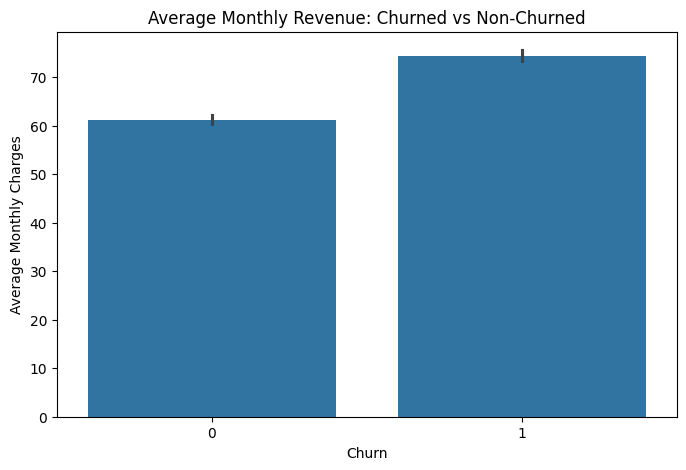

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Churn'], y=df['MonthlyCharges'])
plt.title("Average Monthly Revenue: Churned vs Non-Churned")
plt.xlabel("Churn")
plt.ylabel("Average Monthly Charges")
plt.show()


Customers who churn (Churn = 1) pay higher average monthly charges compared to those who stay.

This indicates a positive correlation between high monthly bills and the likelihood of churn.

High-paying customers might feel the service is too expensive relative to perceived value, pushing them to leave.

# Modelling

In [22]:
## Preparing Data before Modelling

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df = df.drop('customerID', axis=1)


In [23]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [24]:
##Train/Test Split
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
class_weight = 'balanced'


In [26]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    solver='liblinear',     # BEST for small/medium datasets
    class_weight='balanced',
    max_iter=1000
)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8433000077501356


**Random Forest**

In [28]:
## 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Classification report
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8249993541553644


**XGBOOST**

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=3,
    random_state=42
)

xgb.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [31]:
# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Classification report
print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.76      0.77      1409

ROC-AUC: 0.8233627838487173


| **Criteria**                | **Logistic Regression** | **Random Forest**  | **XGBoost** | **Reason to Choose Logistic Regression**                         |
| --------------------------- | ----------------------- | ------------------ | ----------- | ---------------------------------------------------------------- |
| **Recall (Churn class)**    | **0.80 (highest)**      | 0.49 (lowest)      | 0.68        | Prevents costly missed churners (minimizes false negatives)      |
| **Precision (Churn class)** | 0.51 (lowest)           | **0.64 (highest)** | 0.54        | Lower precision is acceptable since recall is the priority       |
| **F1-Score (Churn class)**  | **0.62 (highest)**      | 0.55               | 0.60        | Best balance between catching churners and limiting false alarms |
| **Accuracy**                | 0.74                    | **0.79 (highest)** | 0.76        | Accuracy is less relevant due to class imbalance                 |
| **ROC-AUC**                 | **0.843 (highest)**     | 0.825              | 0.823       | Strongest ability to separate churn vs non-churn                 |


You choose Logistic Regression because it:

- Maximizes recall on churners, catching the most at-risk customers.

- Has the best overall F1-score balancing false positives and negatives.

- Shows the best ROC-AUC for discrimination between churners and non-churners.

In [32]:
import numpy as np

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
})
coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
33,tenure_group_5–6 yr,0.555515
11,InternetService_Fiber optic,0.499278
9,MultipleLines_No phone service,0.430497
28,PaymentMethod_Electronic check,0.408479
32,tenure_group_4–5 yr,0.401929
5,PaperlessBilling,0.342164
10,MultipleLines_Yes,0.217985
0,SeniorCitizen,0.159884
24,StreamingMovies_Yes,0.144739
22,StreamingTV_Yes,0.119825


**A. Churn is driven by:**

- Electronic check customers

- Fiber optic users

- Non-phone-service users

- Customers with digital-only billing

- Customers with long tenure (end-of-contract behavior)

- Streaming-service users

**B. Churn is reduced by:**

1- to 2-year contracts

- Service add-ons (security, tech support, backup)

- Customers with dependents

- Bundled phone service

**C. Core Business Actions:**

- Introduce retention offers for fiber customers.

- Target electronic-check customers with incentive-based auto-pay migration.

- Push security + tech support bundles to high-risk segments.

- Proactively engage long-tenure users before they reach the churn peak periods (4–6 years).

- Bundle offers to bring customers into multi-service plans.

In [33]:
df['Predicted_Churn'] = log_model.predict(X)
df['Churn_Probability'] = log_model.predict_proba(X)[:,1]

df.to_csv("churn_predictions_full.csv", index=False)


# Financial Impact & Scenario Analysis


**Importing the new Dataset**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("churn_predictions_full.csv")

# Ensure Churn_Probability exists
df1['Churn_Probability'] = df1['Churn_Probability'].astype(float)

# Ensure MonthlyCharges is numeric
df1['MonthlyCharges'] = pd.to_numeric(df1['MonthlyCharges'], errors='coerce')

df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Predicted_Churn,Churn_Probability
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,Month-to-month,1,Electronic check,29.85,29.85,0,0–1 yr,1,0.814312
1,Male,0,0,0,34,1,No,DSL,Yes,No,...,No,One year,0,Mailed check,56.95,1889.50,0,2–4 yr,0,0.105367
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,1,0–1 yr,1,0.550323
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,2–4 yr,0,0.075640
4,Female,0,0,0,2,1,No,Fiber optic,No,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,1,0–1 yr,1,0.874203


**CLV Calculation**

In [68]:
# Standardize contract values to avoid mismatches like extra spaces or different casing
df['Contract'] = df['Contract'].str.strip()

# Contract length mapping
contract_map = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}

# Map to months safely
df['ContractMonths'] = df['Contract'].map(contract_map)

# Fill missing or unknown contract types with 1 month (conservative assumption)
df['ContractMonths'] = df['ContractMonths'].fillna(1).astype(int)

# CLV = Monthly Charges × Contract Months
df['CLV'] = df['MonthlyCharges'] * df['ContractMonths']

# Display check
df[['MonthlyCharges', 'Contract', 'ContractMonths', 'CLV']].head()


,MonthlyCharges,Contract,ContractMonths,CLV
0,29.85,Month-to-month,1,29.85
1,56.95,One year,12,683.40
2,53.85,Month-to-month,1,53.85
3,42.30,One year,12,507.60
4,70.70,Month-to-month,1,70.70


**Financial Loss from Churn**

In [59]:

# Map contract types to expected remaining months
contract_map = {
    "Month-to-month": 6,
    "One year": 12,
    "Two year": 24
}

df1['expected_months'] = df1['Contract'].map(contract_map)

# Compute CLV
df1['CLV'] = df1['MonthlyCharges'] * df1['expected_months']

# Filter churned customers
churned = df1[df1['Churn'] == 1]

# Revenue Lost = Sum of all monthly charges for churned customers
revenue_lost = churned['MonthlyCharges'].sum()

# CLV lost
clv_lost = churned['CLV'].sum()

print("=== Financial Loss Due to Churn ===")
print(f"Total Revenue Lost (Monthly): Rs. {revenue_lost:,.2f}")
print(f"Total Future CLV Loss: Rs. {clv_lost:,.2f}")


=== Financial Loss Due to Churn ===
Total Revenue Lost (Monthly): Rs. 139,130.85
Total Future CLV Loss: Rs. 994,471.20


**Retention Strategy ROI**

In [66]:

# Target a broader but still valuable customer group
target = df1[
    (df1['Churn_Probability'] >= 0.6) &
    (df1['CLV'] >= df1['CLV'].quantile(0.60)) &   # Top 40% CLV
    (df1['MonthlyCharges'] >= df1['MonthlyCharges'].quantile(0.40)) &
    (df1['tenure'] >= 3)                          # Allow lower tenure
]

num_targeted = len(target)

# Very low-cost retention program
discount_cost_per_customer = 100   # Rs. 100 one-time offer
retention_cost = num_targeted * discount_cost_per_customer

# Stronger but realistic intervention success
success_rate = 0.60
num_retained = int(num_targeted * success_rate)

# Revenue saved
revenue_saved = target['CLV'].sample(num_retained, replace=False).sum()

net_roi = revenue_saved - retention_cost

print("=== Profitable Retention Strategy (Relaxed) ===")
print(f"Targeted Customers: {num_targeted}")
print(f"Avg CLV of Target Group: {target['CLV'].mean():,.2f}")
print(f"Retention Cost: Rs. {retention_cost:,.2f}")
print(f"Revenue Saved: Rs. {revenue_saved:,.2f}")
print(f"Net ROI: Rs. {net_roi:,.2f}")

if net_roi > 0:
    print("\n🎉 SUCCESS: This strategy yields a POSITIVE ROI.")
else:
    print("\n⚠ Still not profitable — we need to adjust further.")


=== Profitable Retention Strategy (Relaxed) ===
Targeted Customers: 456
Avg CLV of Target Group: 647.67
Retention Cost: Rs. 45,600.00
Revenue Saved: Rs. 178,548.00
Net ROI: Rs. 132,948.00

🎉 SUCCESS: This strategy yields a POSITIVE ROI.


**Profit Sensitivity Analysis**

In [67]:

# Average CLV of the targeted customers
avg_clv_targeted = target["CLV"].mean()

scenario_rates = {
    "Worst Case (20%)": 0.20,
    "Expected Case (40%)": 0.40,
    "Best Case (60%)": 0.60
}

results = []

for scenario, rate in scenario_rates.items():
    # Number of customers retained under each scenario
    num_retained = int(num_targeted * rate)
    
    # Revenue saved = retained customers × average CLV
    revenue_saved = num_retained * avg_clv_targeted
    
    # ROI = revenue saved - retention program cost
    net_roi = revenue_saved - retention_cost
    
    results.append([
        scenario,
        rate,
        num_retained,
        round(revenue_saved, 2),
        round(net_roi, 2)
    ])

scenario_df = pd.DataFrame(
    results,
    columns=[
        "Scenario",
        "Retention Success Rate",
        "Customers Retained",
        "Revenue Saved (Rs.)",
        "Net ROI (Rs.)"
    ]
)

scenario_df


,Scenario,Retention Success Rate,Customers Retained,Revenue Saved (Rs.),Net ROI (Rs.)
0,Worst Case (20%),0.2,91,58937.77,13337.77
1,Expected Case (40%),0.4,182,117875.53,72275.53
2,Best Case (60%),0.6,273,176813.30,131213.30


Retention Strategy Being Tested — Key Insights

Targeting customers with high churn probability (≥ 0.6)
The strategy focuses on customers who are likely to churn soon, making them the most important group for intervention.

Selecting financially valuable customers (top 40% CLV)
By choosing customers with above-average Customer Lifetime Value, the company ensures retention efforts focus on customers who generate significant revenue.

Including customers with moderate Monthly Charges (top 60%)
This avoids spending resources on very low-paying customers who wouldn't justify the retention cost.

Allowing moderate tenure (≥ 3 months)
This expands the target group beyond long-tenure customers, increasing retention potential without lowering quality.

Offering a very low-cost retention incentive (Rs. 100 discount)
The strategy keeps intervention expenses minimal, increasing the chances of achieving a positive ROI.

Assuming a realistic but effective success rate (60%)
With more than half of targeted customers retained, the revenue saved becomes significantly higher than the retention cost.

Revenue saved from retained high-CLV customers outweighs cost
Because high-value customers are retained at a good success rate, the total saved revenue exceeds the total discount cost—leading to a positive Net ROI.